# Data Dictionary

Tập dữ liệu này chứa giá bán nhà cho Quận King, bao gồm thành phố Seattle. Nó bao gồm các ngôi nhà được bán từ tháng 5 năm 2014 đến tháng 5 năm 2015. Dưới đây là mô tả các column trong tập dữ liệu 






| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | id cho ngôi nhà                                                                        |
| date          | Ngày nhà được bán                                                                         |
| price         | GIá nhà - Đây là columns ta muốn dự đoán                                                                    |
| bedrooms      | Số phòng ngủ                                                                           |
| bathrooms     | Số phòng tắm                                                                              |
| sqft_living   | Diện tích của ngôi nhà                                                                |
| sqft_lot      | Diện tích của khu đất                                                                  |
| floors        | Tổng số tầng trong ngôi nhà                                                               |
| waterfront    | Nhà có tầm nhìn ra sông hoặc biển không                                                           |
| view          | Đã được xem                                                                               |
| condition     | Tình trạng chung của ngôi nhà                                                               |
| grade         | Mức độ tổng thể của ngôi nhà, dựa trên hệ thống xếp loại của King County |
| sqft_above    | Diện tích của nhà ngoài tầng hầm                                                    |
| sqft_basement | Diện tích của tầng hầm                                                                 |
| yr_built      | Năm xây dựng                                                                                 |
| yr_renovated  | Năm nhà được cải tạo                                                                     |
| zipcode       | Mã Zip                                                                                     |
| lat           | Vĩ độ                                                                               |
| long          | Kinh độ                                                                              |
| sqft_living15 | Diện tích phòng khách vào năm 2015 (ngụ ý - một số cải tạo) Điều này có thể đã ảnh hưởng hoặc không ảnh hưởng đến diện tích khu đất|
| sqft_lot15    | Diện tích khu đất vào năm 2015 (ngụ ý - một số cải tạo)                                                           |


# Predict House Price với các model như : Linear regression, Multi regression

# <span id="2"></span> Importing Modules, Reading the Dataset and Defining an Evaluation Table

<hr/>

Để thực hiện một số phân tích, chúng ta cần thiết lập môi trường làm việc của mình. Để làm điều này, em đã nhập một số module và đọc dữ liệu. Đầu ra dưới đây là toàn bộ dữ liệu em đã xác định một bảng dữ liệu rỗng. Bảng dữ liệu này bao gồm **Root Mean Squared Error (RMSE là thước đo độ lệch trung bình giữa các giá trị dự đoán và giá trị thực tế trong tập dữ liệu), R-squared (R-squared là một đại lượng thống kê đo độ lệch của dữ liệu với đường hồi quy được sử dụng để khớp với dữ liệu), Adjusted R-squared** và trung bình các giá trị **R-squared** được đạt được bằng phương pháp **Kiểm định chéo k-Fold**, đây là các chỉ số quan trọng để so sánh các mô hình khác nhau. Một giá trị **R-squared** gần với một và RMSE càng nhỏ thì sai số càng ít

In [17]:
import numpy as np # Đây là thư viện xử lý mảng nhiều chiều và ma trận
import pandas as pd # Đây là thư viện làm việc với file và DataFrame
from sklearn.model_selection import train_test_split # dùng để chia dữ liệu thành 2 phần train và test
from sklearn import linear_model # dùng để gọi model hồi quy tuyến tính
from sklearn.neighbors import KNeighborsRegressor # dùng để gọi model KNN
from sklearn.preprocessing import PolynomialFeatures #dùng để gọi model hồi quy đa thức
from sklearn import metrics # dùng để tính các chỉ số đánh giá mô hình
from sklearn.model_selection import cross_val_score # dùng để tính cross validation
import matplotlib.pyplot as plt # Đây là thư viện vẽ chart để visualize dữ liệu
import seaborn as sns # Tương tự matplotlib, nhưng có thể vẽ được nhiều chart hơn và đẹp hơn
from mpl_toolkits.mplot3d import Axes3D # Dùng để vẽ 3D chart
import folium # Đây là thư viện vẽ map
from folium.plugins import HeatMap #Dùng để vẽ heatmap
#%matplotlib inline # dùng để hiển thị chart ngay trên jupyter notebook
import warnings # dùng để bỏ qua các cảnh báo
warnings.filterwarnings('ignore') # dùng để bỏ qua các cảnh báo

# 
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[], # Độ lệch chuẩn của các điểm dữ liệu so với đường hồi quy
                           # RMSE là thước đo độ lệch trung bình giữa các giá trị dự đoán và giá trị thực tế trong tập dữ liệu.
                           'R-squared (training)':[], # Độ chính xác của mô hình trên tập huấn luyện
                           'Adjusted R-squared (training)':[], # R-squared is a statistical measure of how close the data are to the fitted regression line.
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df = pd.read_csv('D:\Desktop\Data Analyst\Python\TTCS\kc_house_data copy.csv') # Đọc dữ liệu từ file csv

df # Show all dataframe 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# <span id="3"></span> Defining a Function to Calculate the Adjusted $R^{2}$

<hr/>

Hệ số xác định R-squared tăng khi số lượng đặc trưng tăng. Vì vậy, em chọn adjusted R-squared và nó chỉ tăng khi việc thêm biến làm giảm Sai số bình phương trung bình (MSE). Công thức của adjusted $R^{2}$ là:

$\bar{R^{2}}=R^{2}-\frac{k-1}{n-k}(1-R^{2})$

Trong đó n là số quan sát và k là tham số

In [18]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# <span id="4"></span> Creating a Simple Linear Regression

<hr/>

Khi chúng ta xây dựng một mối quan hệ tuyến tính giữa biến phụ thuộc và chỉ một biến giải thích, điều này được gọi là **Simple Linear Regression**. Muốn dự đoán giá nhà và sau đó, biến phụ thuộc của chúng ta là giá. Tuy nhiên, đối với một mô hình đơn giản, chúng ta cũng cần chọn một đặc trưng (feature). Khi nhìn vào các cột của tập dữ liệu, diện tích sống (sqft) có vẻ là đặc trưng quan trọng nhất. Khi chúng ta xem xét ma trận tương quan, chúng ta có thể quan sát thấy rằng giá có hệ số tương quan cao nhất với diện tích sống (sqft) và điều này cũng hỗ trợ quan điểm của em. Do đó, em quyết định sử dụng **diện tích sống (sqft)** làm biến đặc trưng . Tóm lại mô hình này dùng biến 'Price' là biến phụ thuộc, 'sqft_living'là biến giải thích - biến đặc trưng

In [19]:
# Create training dataset and testing dataset
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

# Create Simple Linear Regression 
lr = linear_model.LinearRegression() 
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1) 
y_train = np.array(train_data['price'], dtype=pd.Series) 
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_)) 
print('Coefficient: {}'.format(lr.coef_))#

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 539744.130
Intercept: -47235.811302901246
Coefficient: [282.2468152]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


Em cũng in ra hệ số góc (Intercept) và hệ số tương quan(Coefficient) cho hồi quy tuyến tính đơn giản. Bằng cách sử dụng những giá trị này và định nghĩa bên dưới, chúng ta có thể ước tính giá nhà thủ công. Phương trình chúng ta sử dụng để ước tính được gọi là hàm hypothesis và được định nghĩa như sau:

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$


## <span id="5"></span> Let's Show the Result

Vì chúng ta chỉ có **hai chiều** trong mô hình hồi quy đơn giản, nên việc vẽ biểu đồ rất đơn giản. Biểu đồ dưới đây cho thấy kết quả của hồi quy đơn giản. Nó không trông hoàn hảo nhưng khi làm việc với các tập dữ liệu thực tế, việc có một sự phù hợp hoàn hảo không dễ dàng.

In [20]:
sns.set(style="white", font_scale=1)

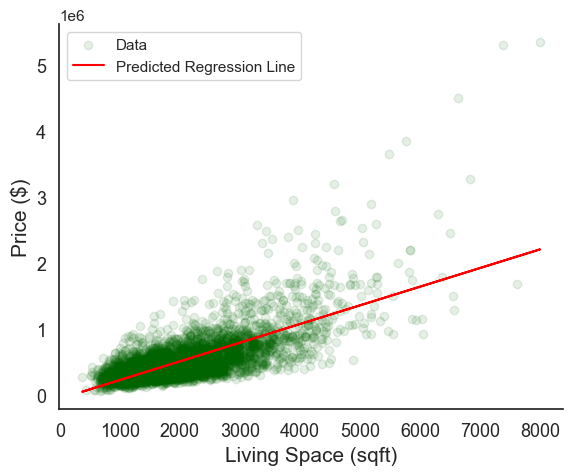

In [21]:
plt.figure(figsize=(6.5,5)) 
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# <span id="6"></span> Visualizing and Examining Data

<hr/>

Đây không phải là dữ liệu quá lớn và chúng ta không có quá nhiều đặc trưng (feature). Do đó, chúng ta có cơ hội để vẽ đồ thị cho hầu hết chúng và đạt được một số kết quả phân tích hữu ích. Việc vẽ biểu đồ và kiểm tra dữ liệu trước khi áp dụng một mô hình là một thực hành tốt vì chúng ta có thể phát hiện ra một số điểm ngoại lai có thể xảy ra hoặc quyết định thực hiện chuẩn hóa dữ liệu. 

Để xác định số phòng ngủ, số tầng hoặc số phòng tắm/phòng ngủ so với giá, chọn **biểu đồ hộp** vì chúng ta có dữ liệu số nhưng chúng không liên tục như 1,2, ... phòng ngủ, 2.5, 3, ... tầng (có thể 0.5 đại diện cho phòng penthouse).

Từ các biểu đồ dưới đây, có thể thấy rằng có rất ít nhà có một số đặc điểm hoặc giá xuất hiện xa hơn so với các giá trị khác như 33 phòng ngủ hoặc giá khoảng 7000000. Tuy nhiên, xác định được tác động tiêu cực có thể mất thời gian và trong các bộ dữ liệu thực tế, luôn có một số ngoại lệ như một số giá nhà sang trọng trong bộ dữ liệu này. Đó là lý do tại sao không có kế hoạch loại bỏ các ngoại lệ.

In [22]:
sns.set(style="whitegrid", font_scale=1)

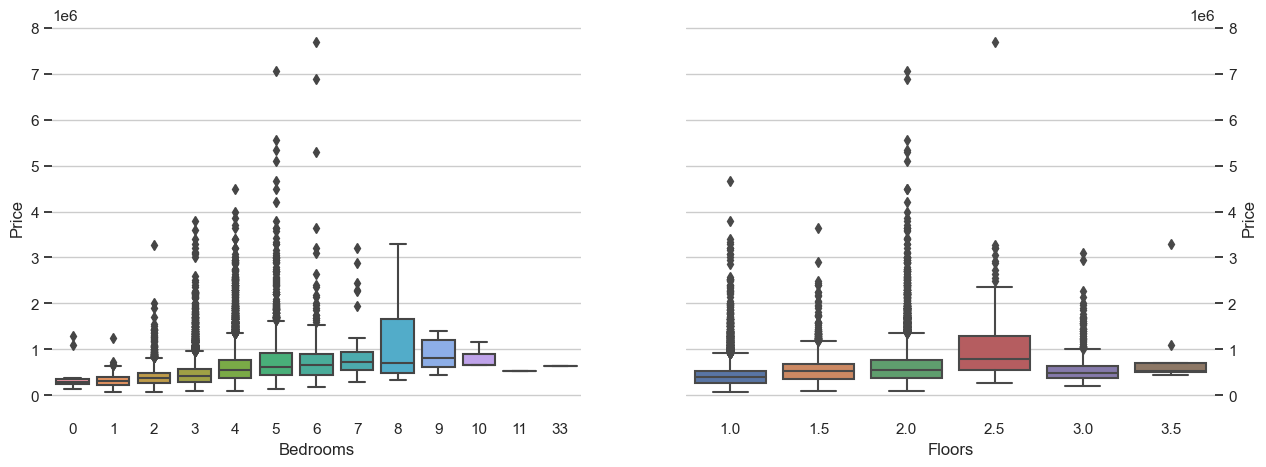

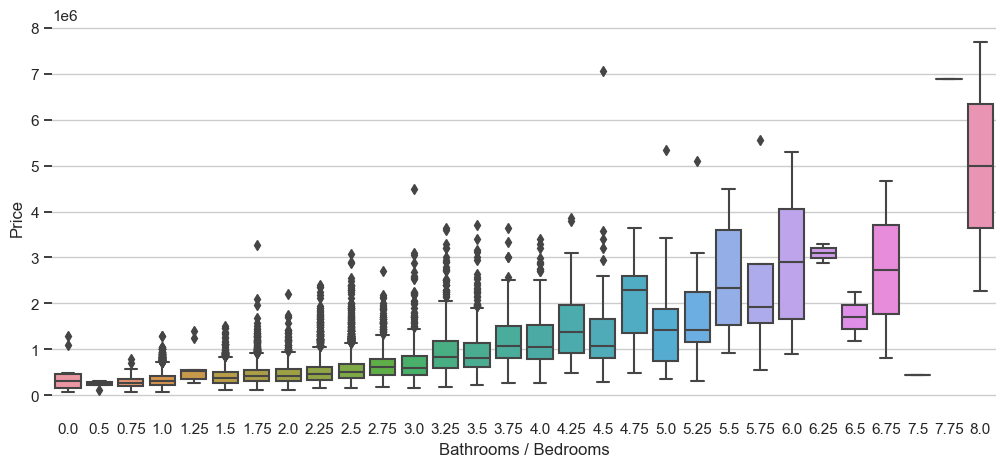

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

Vẽ biểu đồ giá trị của một số đặc điểm so với giá nhà và có vẻ như không có mối quan hệ tuyến tính hoàn hảo giữa giá và những đặc điểm đó. Trong khi đó, mối quan hệ giữa chúng thì sao? Để thể hiện điều này, sử dụng biểu đồ 3D. Sử dụng màu xanh nhạt làm màu cho điểm. Các phần xanh đậm có nghĩa là mật độ cao, nhiều điểm xanh nhạt chồng lên nhau và trở nên tối hơn.

Các biểu đồ dưới đây cho thấy rằng khi sqrt_living tăng, sqrt_lot và số phòng ngủ hoặc số phòng tắm/phòng ngủ cũng tăng. Tuy nhiên, số tầng, số phòng ngủ và số phòng tắm/phòng ngủ hoặc sqrt_living lại không có mối quan hệ tương tự nhau.

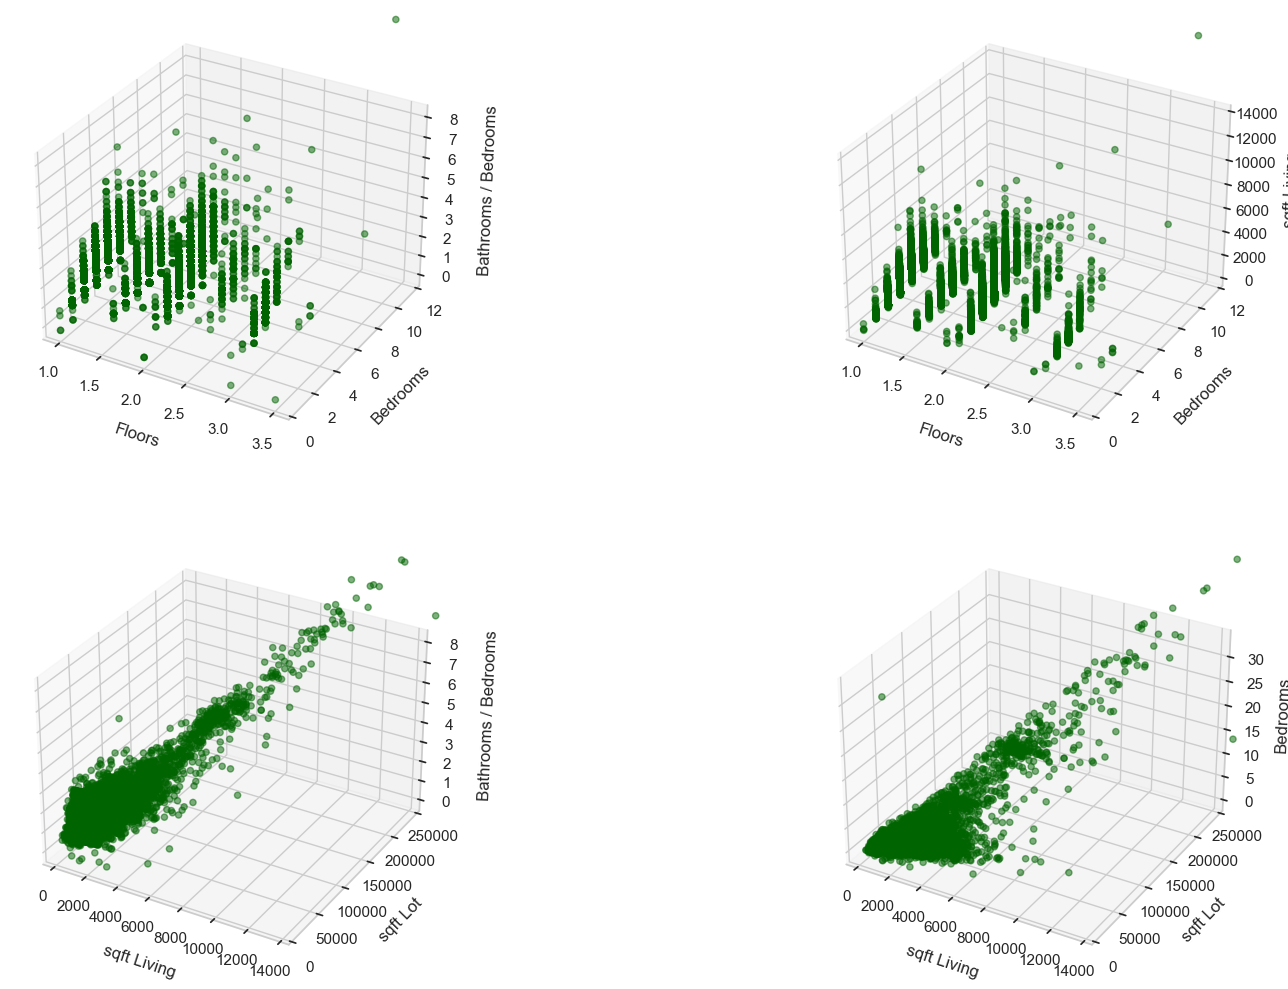

In [24]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

Trực quan hóa nhiều tính năng hơn. Khi chúng ta nhìn vào các biểu đồ hộp dưới đây, độ lớn của ngôi nhà và bãi biển ảnh hưởng đến giá một cách rõ rệt. Trong khi đó, quan điểm về cảnh quan có vẻ ít ảnh hưởng, nhưng nó cũng có ảnh hưởng đến giá.






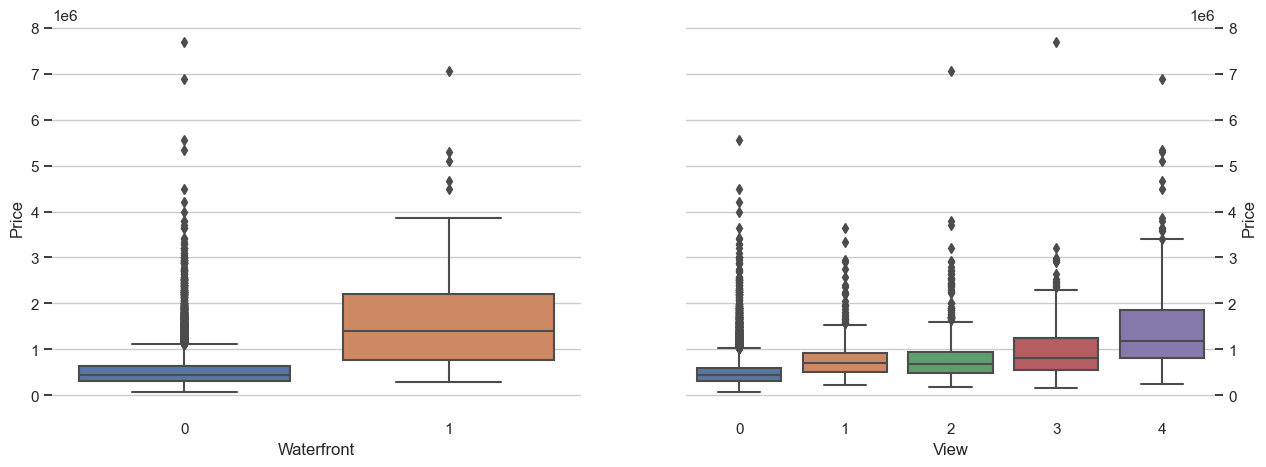

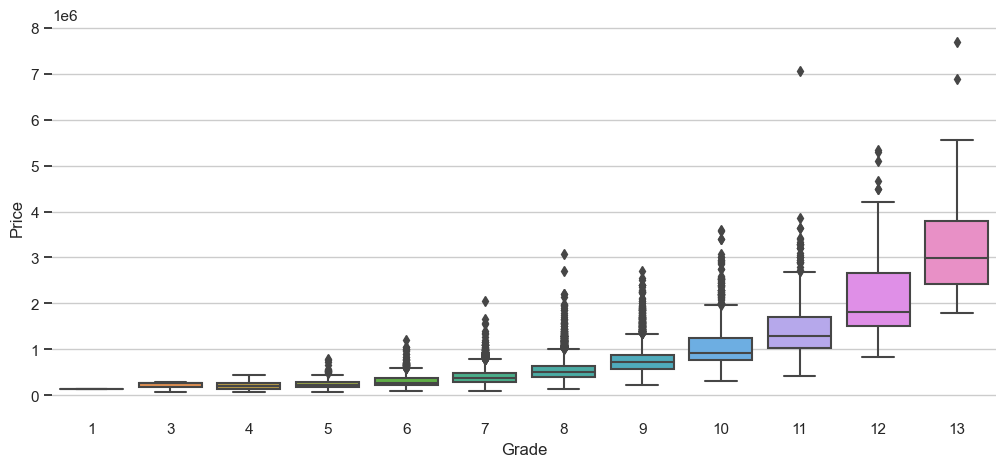

In [25]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');


Vẽ biểu đồ 3D để xác định mối quan hệ giữa view, grade và năm xây dựng (yr_built). Biểu đồ dưới đây cho thấy những ngôi nhà mới hơn có mức độ đánh giá tốt hơn nhưng chúng ta không thể nói nhiều về sự thay đổi của view.

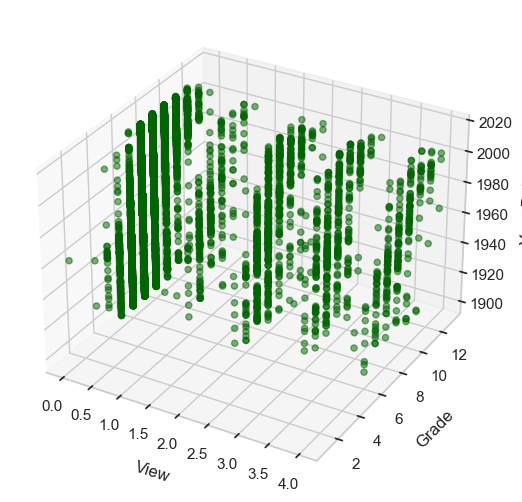

In [26]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data['view'],train_data['grade'],train_data['yr_built'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

Trong bộ dữ liệu này, chúng ta có thông tin về vĩ độ và kinh độ của các ngôi nhà. Bằng cách sử dụng cột lat và long, đã hiển thị bản đồ nhiệt dưới đây, rất hữu ích cho những người không quen biết với Seattle. Ngoài ra, nếu bạn chọn một mã bưu chính cụ thể, bạn có thể chỉ xem bản đồ nhiệt của khu phố thuộc mã bưu chính này.

In [27]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## <span id="7"></span> Checking Out the Correlation Among Explanatory Variables

Có quá nhiều đặc trưng trong một mô hình không phải lúc nào cũng tốt vì nó có thể gây ra tình trạng overfitting và kết quả tồi hơn khi chúng ta muốn dự đoán giá trị cho một bộ dữ liệu mới. Do đó, **nếu một đặc trưng không cải thiện mô hình của bạn một cách đáng kể, việc không thêm nó có thể là một lựa chọn tốt hơn.**

Một điều quan trọng khác là tương quan. **Nếu có mức độ tương quan rất cao giữa hai đặc trưng, giữ cả hai đặc trưng không phải lúc nào cũng là một ý tưởng tốt, để không gây ra tình trạng overfitting**. Ví dụ, nếu có tình trạng overfitting, chúng ta có thể loại bỏ sqt_above hoặc sqt_living vì chúng có mối quan hệ cao. Mối quan hệ này có thể được ước tính khi chúng ta xem các định nghĩa trong bộ dữ liệu, nhưng để chắc chắn, ma trận tương quan nên được kiểm tra. Tuy nhiên, điều này không có nghĩa là bạn phải loại bỏ một trong những đặc trưng có mức độ tương quan cao. Ví dụ: phòng tắm và sqrt_living. Chúng có mức độ tương quan cao nhưng em không nghĩ rằng mối quan hệ giữa chúng giống như mối quan hệ giữa sqt_living và sqt_above.

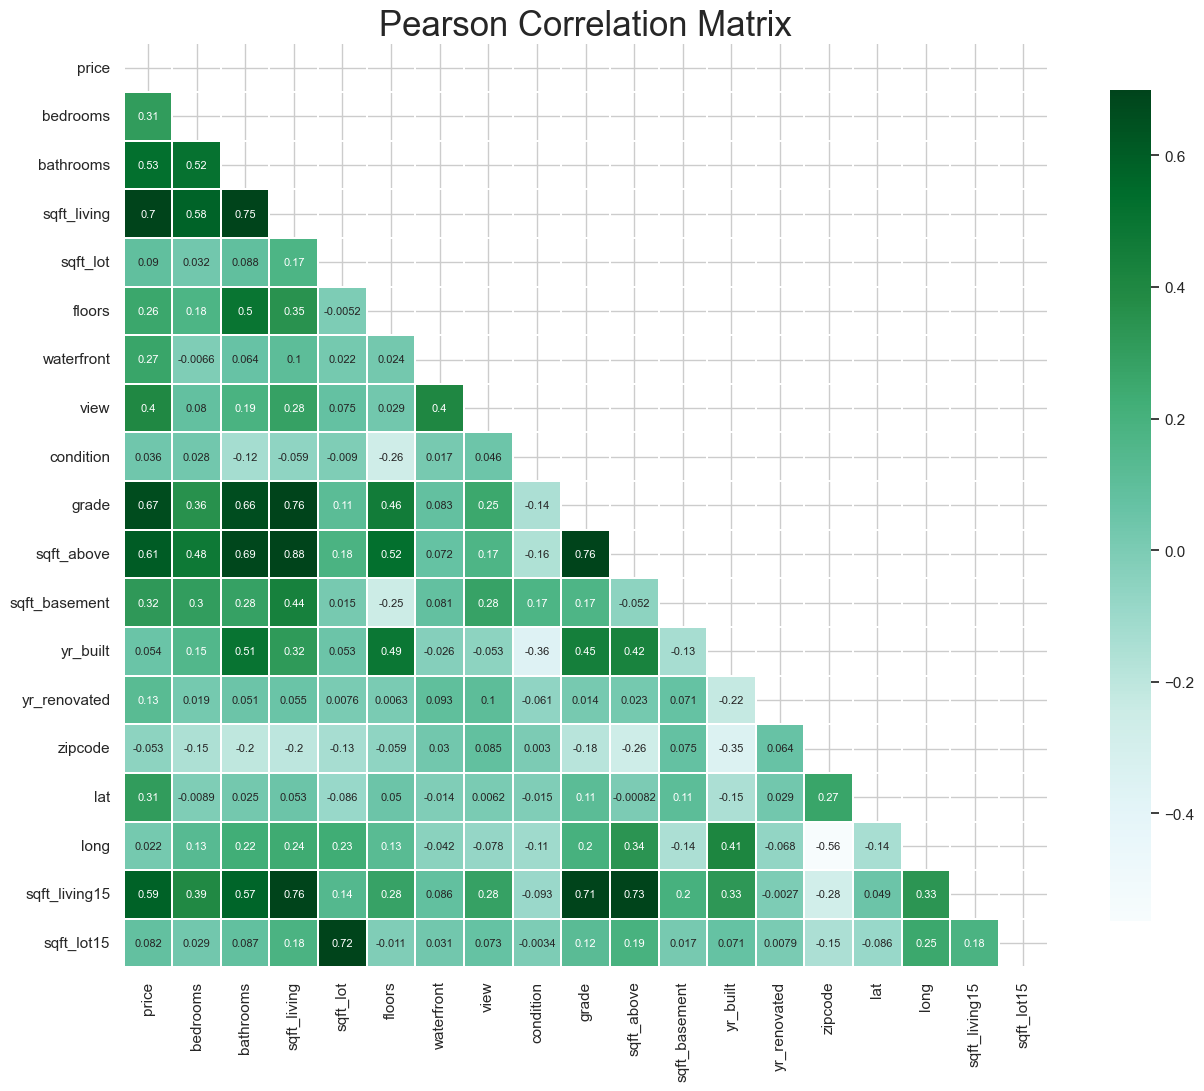

In [28]:
# define a function to draw a basemap easily
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
# Set up the matplotlib figure  
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
# Draw the heatmap using seaborn
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# <span id="8"></span> Data Preprocessing
<hr/>

Việc tiền xử lý dữ liệu có thể cải thiện độ chính xác của mô hình và làm cho mô hình đáng tin cậy hơn. Điều này không phải lúc nào cũng cải thiện kết quả của chúng ta, nhưng khi chúng ta nhận thức được các tính năng và sử dụng đầu vào thích hợp, chúng ta có thể dễ dàng đạt được một số kết quả. Em đã thử nghiệm các kỹ thuật khai thác dữ liệu khác nhau như biến đổi hoặc chuẩn hóa, nhưng cuối cùng, quyết định chỉ sử dụng binning và tạo một khung dữ liệu mới gọi là **df_dm.**

In [29]:
df_dm=df.copy()
df_dm.describe() # show the summary of the dataframe

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## <span id="9"></span> Binning

Binning dữ liệu là một kỹ thuật tiền xử lý (Preprocessing) được sử dụng để giảm thiểu ảnh hưởng của các sai số quan sát nhỏ. Nó đáng áp dụng cho một số cột trong bộ dữ liệu này. Em đã áp dụng binning cho yr_built và yr_renovated. Em đã thêm tuổi và tuổi cải tạo của các căn nhà khi bán. Ngoài ra, em phân vùng các cột này thành các khoảng và thầy có thể quan sát điều này trong các biểu đồ **histogram** bên dưới.

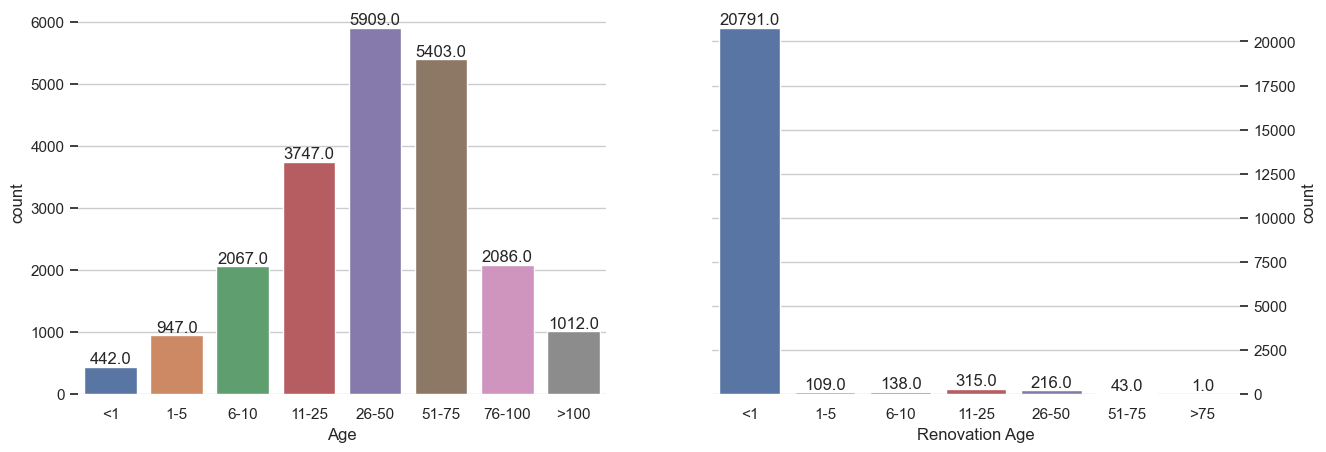

In [36]:
# Convert 'age_binned' column to categorical data type
df_dm['age_binned'] = pd.Categorical(df_dm['age_binned'])

# histograms for the binned columns
f, axes = plt.subplots(1, 2, figsize=(15, 5))
p1 = sns.countplot(x='age_binned', data=df_dm, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x() + p.get_width() / 2, height + 50, height, ha="center")

p2 = sns.countplot(x='age_rnv_binned', data=df_dm, ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x() + p.get_width() / 2, height + 200, height, ha="center")

axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age')

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned', 'age_rnv_binned'])


# <span id="10"></span> Multiple Regression

<hr/>

Mô hình hồi quy tuyến tính đơn giản cho thấy thấy kết quả rất kém. Để cải thiện mô hình này, em dự định thêm nhiều tính năng hơn. Khi chúng ta có **nhiều hơn một feature** trong một mô hình hồi quy tuyến tính, nó được định nghĩa là **hồi quy đa biến**. Sau đó, đến lúc tạo ra một số mô hình phức tạp.

## <span id="11"></span> Multiple Regression - 1

Xác định **features** ngay từ cái nhìn đầu tiên bằng cách xem các phần trước và sử dụng chúng trong mô hình hồi quy tuyến tính đa biến đầu tiên của tôi. Giống như trong hồi quy đơn giản, em đã in các hệ số mà mô hình sử dụng cho các dự đoán. Tuy nhiên, lần này chúng ta phải sử dụng định nghĩa dưới đây cho các dự đoán của chúng ta nếu chúng ta muốn tính toán thủ công:

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$

In [ ]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode'] # Using zip code as a feature becasue it is a categorical variable
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -57221293.13485957
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


## <span id="12"></span> Multiple Regression - 2

Thêm nhiều **feature** vào danh sách feature. Khi chúng ta đánh giá thì đã cải thiện đáng kể sai số.

In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 14932064.4567091
Coefficients: [-3.74523328e+04  4.83495326e+04  1.71684976e+02 -2.31081061e-01
  1.03590806e+04  5.56285921e+05  4.78399848e+04  1.24143045e+05
 -8.88123227e+04 -1.05756567e+05 -1.04723750e+05 -1.35898725e+05
 -5.37336956e+04  8.41048129e+04  1.84153081e+05  2.20667166e+05
 -1.60046391e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


## <span id="13"></span> Multiple Regression - 3

Tạo một mô hình với **tất cả các đặc trưng mà không có bất kỳ tiền xử lý nào**. Các chỉ số đánh giá sai số đã cải thiện đáng kể.

In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','all features, no preprocessing',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 7580919.940351892
Coefficients: [-3.51323305e+04  4.25821114e+04  1.10705020e+02  1.13581822e-01
  6.82992716e+03  5.61794985e+05  5.28174040e+04  2.48918356e+04
  9.57708783e+04  7.01998424e+01  4.05051775e+01 -2.70948034e+03
  2.26715091e+01 -5.80427853e+02  5.98629230e+05 -2.08875497e+05
  2.32857416e+01 -3.75353459e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


## <span id="14"></span> Multiple Regression - 4

Lần này sử dụng dữ liệu được thu thập sau bước tiền xử lý preprocessing 

In [ ]:
# create a list of features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_4 = linear_model.LinearRegression() # create a complex model object
complex_model_4.fit(train_data_dm[features],train_data_dm['price']) # train the model

print('Intercept: {}'.format(complex_model_4.intercept_)) 
print('Coefficients: {}'.format(complex_model_4.coef_))

# make predictions
pred = complex_model_4.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

# print metrics
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 8748434.764235206
Coefficients: [-3.33491904e+04  3.76549641e+04  1.10716217e+02  1.22826592e-01
 -1.26725956e+04  5.69817402e+05  5.41386091e+04  3.17275550e+04
  9.52300581e+04  7.05366502e+01  4.01794917e+01 -4.46861874e+04
 -5.43838963e+04 -7.11287025e+04 -8.93583274e+04 -5.92594439e+04
  3.70943651e+04  1.22837694e+05  1.58884499e+05 -1.97812401e+04
  9.43034022e+04  8.74164248e+04  4.14131931e+04 -1.50309593e+04
 -1.06990366e+05 -8.13304552e+04 -6.50061210e+02  6.03335811e+05
 -2.10031732e+05  2.42386074e+01 -3.08651553e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,191879.550,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


# <span id="15"></span> Regularization

<hr/>

Chính sách điều chỉnh **(Regularization)** được thiết kế để giải quyết vấn đề quá khớp (overfitting) và thiếu khớp (underfitting). Quá khớp **(overfitting)** có nghĩa là phương sai cao và thường được gây ra bởi một hàm phức tạp tạo ra nhiều đường cong và góc không cần thiết không liên quan đến dữ liệu. Hàm này phù hợp với dữ liệu huấn luyện tốt nhưng có thể gây ra kết quả kém cho tập kiểm tra. Trong khi đó, thiếu khớp **(underfitting)** có nghĩa là phương sai thấp và mô hình rất đơn giản. Điều này cũng có thể gây ra kết quả kém. Một số biện pháp khắc phục có thể là điều chỉnh các tính năng thủ công hoặc sử dụng một số thuật toán lựa chọn mô hình để mang lại khối lượng công việc bổ sung. Tuy nhiên, khi chúng ta áp dụng chính sách điều chỉnh, tất cả các tính năng được giữ nguyên và mô hình điều chỉnh θj. Điều này đặc biệt hữu ích khi chúng ta có rất nhiều tính năng hơi hữu ích. Có hai loại điều chỉnh phổ biến (Ridge và Lasso Regressions) và trong phần này, tôi đã sử dụng chúng.

Khi nào nên sử dụng hồi quy Ridge và hồi quy Lasso:

+ Nhiều hiệu ứng nhỏ/trung bình: sử dụng hồi quy Ridge.
+ Chỉ một vài biến số với hiệu ứng trung bình/lớn: sử dụng hồi quy Lasso.


## <span id="16"></span> Ridge Regression


Hồi quy Ridge được gọi là **L2 regularization** , chúng ta có phương trình sau đây.

$$RSS_{RIDGE} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}\theta^{2}_{j}$$

Bằng cách thay đổi giá trị α , chúng ta có thể kiểm soát lượng regularization. Khi tăng giá trị của α , regularization tăng và ngược lại. Vì vậy chọn các giá trị α khác nhau và sử dụng một phương trình hồi quy tuyến tính không có regularization để quan sát sự khác biệt một cách dễ dàng.

In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,191879.550,0.701,0.7,0.713,0.711,0.698
5,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
6,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
7,Ridge Regression,"alpha=1000, all features",209625.468,0.651,0.65,0.658,0.655,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


## <span id="17"></span> Lasso Regression

Lasso regression gọi là **L1 regularization** and và công thức là :

$$RSS_{LASSO} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

Sự khác nhau giữa ridge and lasso là vế thứ 2 của biểu thức 

In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,191879.550,0.701,0.7,0.713,0.711,0.698
5,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.7,0.713,0.711,0.698
8,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.7,0.713,0.711,0.698
9,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
10,Lasso Regression,"alpha=1000, all features",193587.943,0.697,0.697,0.708,0.706,0.695
6,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
7,Ridge Regression,"alpha=1000, all features",209625.468,0.651,0.65,0.658,0.655,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512


# <span id="18"></span> Polynomial Regression

<hr/>

Đối với các mô hình tuyến tính (linear model), ý tưởng chính là phù hợp với một đường thẳng với dữ liệu của chúng ta. Tuy nhiên, nếu dữ liệu có phân bố bậc hai, lần này chọn một hàm bậc hai và áp dụng biến đổi đa thức có thể mang lại kết quả tốt hơn. Lần này hàm (hypothesis) được định nghĩa như sau:

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x+\theta_{2}x^{2}+...+\theta_{n}x^{n}$$

Vì có nhiều biến thể cho hồi quy đa thức, ta muốn hiển thị kết quả bằng một bảng mới và có thể thấy từ bảng dưới đây rằng phép biến đổi đa thức đã cải thiện rất nhiều vế sai số. Tuy nhiên, khi sử dụng phép biến đổi đa thức và quyết định mức độ của nó, chúng ta phải rất cẩn thận vì nó có thể **gây ra overfitting**. Ngoài ra, trong bảng dưới đây, overfitting tồn tại đối với một số mô hình. Các độ đo chéo 5 lần cho các mô hình này là âm hoặc thấp mặc dù chúng có giá trị R-squared rất cao cho tập huấn luyện.
Note: degree = 2 => Hàm H0 ở bậc 2

In [ ]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['price'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['price'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['price'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['price'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
2,Polynomial Regression,"degree=2, all features, no preprocessing",151169.158,0.830,0.822,0.813
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",159872.571,0.810,0.801,0.791
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",166020.484,0.797,0.785,0.779
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166195.984,0.807,0.785,0.778
0,Polynomial Regression,"degree=2, selected features, no preprocessing",191016.540,0.730,0.716,0.714
1,Polynomial Regression,"degree=3, selected features, no preprocessing",188734.434,0.749,0.722,0.517
3,Polynomial Regression,"degree=3, all features, no preprocessing",192822.092,0.869,0.710,0.224
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",150177.193,0.838,0.824,-3196.162
4,Polynomial Regression,"degree=2, all features",151647.981,0.840,0.821,-10737.410
